# Comparaison valeurs brutes et moyennes pour le patient P03

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal as sg
import pandas_signal as pds
from IPython.display import display, HTML  # pour l'affichage double
sns.set()

In [3]:
eeg = pd.read_excel('Copie de Moyenne_10Min_Fabien_TempsFrequence.xlsx')
eeg.index = eeg.iloc[:, 1]

eeg.columns = eeg.iloc[0, :]
eeg0 = eeg.iloc[1:, :]
eeg1 = eeg0.dropna(axis=1, how='all')
display(eeg1)

Numéro de Période,Time (epoch),Numéro de Période,P03 Moyenne Delta Fz-Cz,P03 Moyenne Theta Fz-Cz,P03 Moyenne Alpha Fz-Cz,P03 Moyenne Beta Fz-Cz,P03MoyenneDET Fz-Cz,P03MoyennePE Fz-Cz,P03MoyenneLAM Fz-Cz,P03MoyenneSVDE Fz-Cz,...,S03-Yeux,Mean Mag.(dB),Mean Freq.(Hz),Mean Total (X),Mean_RR,SDNN,HFn,RatioLH/HF,Time_S03,S03_Sum_Density_10min
Numéro de Période,,,,,,,,,,,,,,,,,,,,,
1,20,1,0.908394,0.0853768,0.00564216,6.27915e-05,0.138133,0.908244,0.0897793,0.500112,...,1,13.73,4.9,18.63,1039,304,0.72,0.38,17:00:00,0
2,40,2,0.905804,0.0878929,0.0062042,7.52185e-05,0.132322,0.908442,0.0911972,0.49664,...,1,13.855,5.25,19.105,1054,106,0.61,0.64,17:10:00,0
3,60,3,0.898509,0.0949082,0.00647619,5.82393e-05,0.131757,0.909717,0.0880102,0.506848,...,1,13.425,5.2,18.625,1045,100,0.49,1.04,17:20:00,0
4,80,4,0.896669,0.0971866,0.00678274,7.84455e-05,0.139731,0.91422,0.0923444,0.502508,...,1,13.605,4.9,18.505,953,95,0.36,1.75,17:30:00,0
5,100,5,0.884968,0.107745,0.0083709,9.54687e-05,0.154378,0.921222,0.103217,0.499975,...,1,13.735,5.5,19.235,979,86,0.54,0.86,17:40:00,0
6,120,6,0.829997,0.148279,0.0214963,0.000197323,0.205932,0.956618,0.145031,0.5663,...,1,13.675,6.35,20.025,1023,84,0.44,1.27,17:50:00,0
7,140,7,0.832092,0.148644,0.0189909,0.000167716,0.210468,0.951999,0.148734,0.550302,...,1,13.49,6,19.49,1044,124,0.48,1.07,18:00:00,0
8,160,8,0.875487,0.111739,0.0114611,9.87513e-05,0.186517,0.932392,0.126917,0.50654,...,1,13.12,5.3,18.42,1034,251,0.69,0.44,18:10:00,0
9,180,9,0.911683,0.0835174,0.00498537,7.98324e-05,0.137078,0.905377,0.0923668,0.48712,...,1,13.6789,5.63158,19.3105,975,331,0.68,0.48,18:20:00,0


In [4]:
eeg2 = pd.read_excel('P03_feat_diff_filt_ArtfEmpty1_ExtrExclTrue.xlsx')
eeg2

,C3-Cz,C3-P3,C4-P4,C4-T4,Cz-C4,Cz-Pz,F3-C3,F4-C4,Fz-Cz,P3-O1,P4-O2,T3-C3,abdo+,ecg+,emg+,heog+,veog+
2014-01-13 19:45:30,0.825388,0.871932,0.885163,0.798013,0.887997,0.803401,0.921109,0.861136,0.918209,NaN,0.785548,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-13 19:45:45,NaN,NaN,NaN,0.832827,0.906249,0.846530,0.920476,0.879020,0.921758,0.793156,0.849985,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-13 19:46:00,NaN,NaN,0.897440,0.848931,0.918842,0.854869,0.905751,0.858567,0.905005,0.806140,NaN,0.906650,NaN,NaN,NaN,NaN,NaN
2014-01-13 19:46:15,0.850513,0.885668,0.906016,0.847949,NaN,0.869855,0.915449,0.859612,0.919559,0.810575,0.836385,0.862018,NaN,NaN,NaN,NaN,NaN
2014-01-13 19:46:30,0.852219,0.874712,NaN,0.836280,0.899630,0.867350,0.918175,0.870192,NaN,0.822945,0.842253,0.792865,NaN,NaN,NaN,NaN,NaN
2014-01-13 19:46:45,0.831990,0.857050,0.898347,0.786834,0.895724,0.862640,0.909785,0.853765,NaN,0.856812,0.826947,0.794282,NaN,NaN,NaN,NaN,NaN
2014-01-13 19:47:00,0.852599,NaN,NaN,0.785764,NaN,NaN,NaN,NaN,NaN,NaN,0.838021,0.884107,NaN,NaN,NaN,NaN,NaN
2014-01-13 19:47:15,NaN,NaN,0.906922,0.814935,0.910690,NaN,NaN,NaN,NaN,0.852658,0.833240,0.885145,NaN,NaN,NaN,NaN,NaN
2014-01-13 19:47:30,NaN,NaN,NaN,0.829123,0.908137,NaN,NaN,0.879821,NaN,0.819284,NaN,0.878803,NaN,NaN,NaN,NaN,NaN
2014-01-13 19:47:45,NaN,NaN,NaN,0.838410,0.900799,NaN,NaN,0.881129,NaN,0.796110,NaN,0.905593,NaN,NaN,NaN,NaN,NaN


## Sélection des données du patient P03 avec le paramètre Delta

In [6]:
def temps_index_patient(data, patient, date=None):
    if date is None:
        date = '2014-01-13 19:40:00' # date dedébut pour p03
    t1 = (str(data.index[1])[-5:-3])
    t0 = (str(data.index[0])[-5:-3])
    time_step = int(t1)- int(t0) # date pour eeg
    if time_step == 0:
        time_step = int(str(data.index[1])[-2:]) - int(str(data.index[0])[-2:])  # date pour eeg2
    freq = str(time_step) + 'min'
    periode = len(data.index) 
    dtindex = pd.date_range(start=date, periods=periode, freq=freq)
    dtindex = pd.DataFrame(dtindex)
    dtindex.rename(columns={0: 'Temps'}, inplace=True)
    return dtindex

def patient(data, numero_patient):
    # Permet de sélectionner les données d'un patient
    col_concernees = []
    for i in range(len(data.iloc[0, :])):
        verif = data.columns[i].find(numero_patient)
        if verif != -1:
            col_concernees.append(data.columns[i])
    data_return = data[col_concernees]
    temps = 'Time_' + numero_patient
    data_return.set_index(temps, inplace=True)
    data_return = data_return.dropna()
    dtindex = temps_index_patient(data_return, numero_patient)
    data_return0 = pd.concat([data_return, dtindex], axis=1)
    for i in range(len(dtindex)):
        if data_return0.iloc[i, -1] is pd.NaT:
            data_return0.iloc[i, -1] = pd.Timestamp(2014, 1, 13, 19, 40, 0) + pd.Timedelta(minutes=10*i)
    N = int(len(data_return0))
    data_return0 = data_return0.iloc[:N//2, :]
    data_return0.set_index('Temps', inplace=True)
    return data_return0

    


#données de eeg
p03 = patient(eeg1, 'P03')
p03delta = pds.parametre_columns(p03, 'Delta')
p03delta = p03delta.iloc[1:]
#p03delta = p03[['P03', 'P03.1', 'P03.2']] #test
display(p03delta)


#données de eeg2
param_plus = pds.parametre_columns(eeg2, 'Fz-Cz') #Fz-Cz
#param_plus = pds.parametre_columns(eeg2, 'Cz')  # TEst
display(param_plus)



CSS = """
div.cell:nth-child(5) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

/home/david/.virtualenvs/Py36/lib/python3.6/site-packages/pandas/core/indexes/api.py:107: RuntimeWarning: '<' not supported between instances of 'datetime.time' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,P03 Moyenne Delta Fz-Cz
Temps,
2014-01-13 19:50:00,0.905804
2014-01-13 20:00:00,0.898509
2014-01-13 20:10:00,0.896669
2014-01-13 20:20:00,0.884968
2014-01-13 20:30:00,0.829997
2014-01-13 20:40:00,0.832092
2014-01-13 20:50:00,0.875487
2014-01-13 21:00:00,0.911683
2014-01-13 21:10:00,0.908532


,Fz-Cz
2014-01-13 19:45:30,0.918209
2014-01-13 19:45:45,0.921758
2014-01-13 19:46:00,0.905005
2014-01-13 19:46:15,0.919559
2014-01-13 19:46:30,NaN
2014-01-13 19:46:45,NaN
2014-01-13 19:47:00,NaN
2014-01-13 19:47:15,NaN
2014-01-13 19:47:30,NaN
2014-01-13 19:47:45,NaN


## Affichage des signaux selon le temps

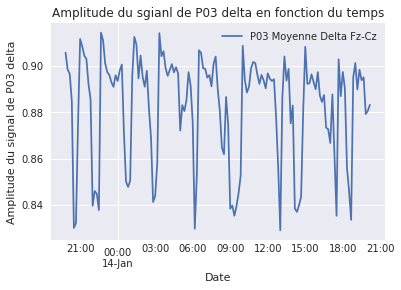

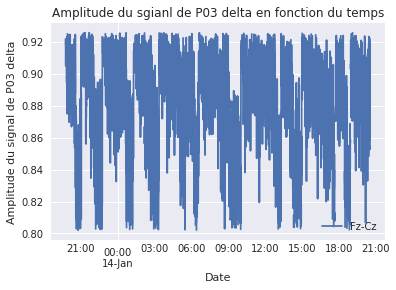

In [7]:
def nom_objet(obj):
    nom = set(varname for varname, varval in globals().items() if varval is obj)
    nom = str(nom)
    nom = nom.split("'")
    nom = nom[1]
    return nom

def affichage_signal_data(signal_data, figure=1):
    signal_data.plot()
    # Attention cette ligne est  à utiliser si la premiere ligne de signal_data n'est pas composée de nombres
    #signal_data.iloc[1:].plot()
    #nom_data = nom_objet(signal_data)
    plt.xlabel('Date')
    #ylab = 'Amplitude des signaux de ' + nom_data
    ylab = 'Amplitude du signal de P03 delta'
    plt.ylabel(ylab)
    # title = 'Amplitude de ' + nom_data + ' en fonction du temps'
    title = ylab = 'Amplitude du sgianl de P03 delta en fonction du temps'
    plt.title(title)
    plt.show()
    
    
affichage_signal_data(p03delta)
affichage_signal_data(param_plus)

## Affichage des signaux en subplot (si plusieurs signaux)

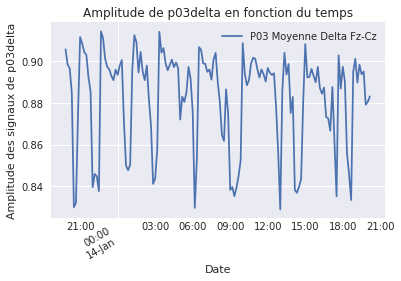

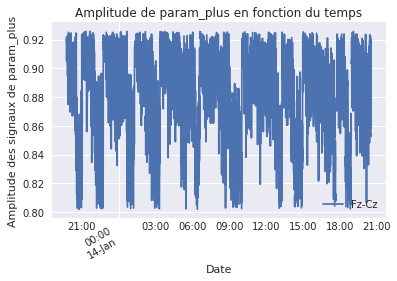

In [8]:
def affichage_signal_data_subplot(signal_data, figure=1):
    signal_data.plot(subplots=True)
    # Attention cette ligne est  à utiliser si la premiere ligne de signal_data n'est pas composée de nombres
    #signal_data.iloc[1:].plot(subplots=True)
    nom_data = nom_objet(signal_data)
    plt.xlabel('Date')
    ylab = 'Amplitude des signaux de ' + nom_data
    plt.ylabel(ylab)
    title = 'Amplitude de ' + nom_data + ' en fonction du temps'
    plt.title(title)
    plt.show()
    

affichage_signal_data_subplot(p03delta)    
affichage_signal_data_subplot(param_plus)

## On rend les données exploitables en enlevant les lignes avec des NaN

In [9]:
def conversion_data_obj_float(data, l0=0, l_fin=None, col0=0, col_fin=None):
    if len(data.shape) == 1:
        data.iloc[l0:l_fin] = data.iloc[l0:l_fin].astype(np.float64)
        return data
    elif len(data.shape) == 2:
        # Si data est une dataframe avec au moins 2 colonnes:
        data.iloc[l0:l_fin, col0:col_fin] = data.iloc[l0:l_fin, col0:col_fin].astype(np.float64)
        return data
    else:
        # Si data n'est pas une dataframe:
        return "Erreur : ", data, " n'est pas une dataframe"

    
def enleve_date_data(data):
    data_to_return = pd.DataFrame()
    for i in range(len(data.iloc[0, :])):
        verif = data.iloc[0, i].find('Time')
        if verif == -1:
            data_to_return = pd.concat([data_to_return, data.iloc[:, i]], axis=1, sort=False)
    return data_to_return


def signal_data(data):
    # Attention à l'ordre des différentes opérations sur data !
    # Peut changer selon data ! Fonction construitre pour pour la variable eeg
    nom = nom_objet(data)
    data_sans_NaN = data.dropna(axis=1, how='all')
    data_sans_NaN = data_sans_NaN.dropna()
    #data_sans_date = enleve_date_data(data_sans_NaN)
    #data_sans_nom_col = data_sans_date.iloc[1:, :]
    # Attention cette ligne est  à modifiée si la premiere ligne de signal_data n'est pas composée de nombres
    data_sans_nom_col = data_sans_NaN.iloc[0:, :]
    data_en_float = conversion_data_obj_float(data_sans_nom_col)
    return data_en_float

In [10]:
p03delta0 = signal_data(p03delta)
param_plus0 = signal_data(param_plus)

display(p03delta0)
display(param_plus0)


CSS3 = """
div.cell:nth-child(13) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS3))


,P03 Moyenne Delta Fz-Cz
Temps,
2014-01-13 19:50:00,0.905804
2014-01-13 20:00:00,0.898509
2014-01-13 20:10:00,0.896669
2014-01-13 20:20:00,0.884968
2014-01-13 20:30:00,0.829997
2014-01-13 20:40:00,0.832092
2014-01-13 20:50:00,0.875487
2014-01-13 21:00:00,0.911683
2014-01-13 21:10:00,0.908532


,Fz-Cz
2014-01-13 19:45:30,0.918209
2014-01-13 19:45:45,0.921758
2014-01-13 19:46:00,0.905005
2014-01-13 19:46:15,0.919559
2014-01-13 19:49:00,0.910980
2014-01-13 19:49:15,0.915016
2014-01-13 19:49:30,0.915071
2014-01-13 19:50:15,0.915927
2014-01-13 19:50:30,0.894712
2014-01-13 19:50:45,0.905295


## Spectres des signaux

In [12]:
def densite_spectrale(s):
    densite = np.abs(np.fft.fft(s))**2
    time_step = float(str(s.index[2] - s.index[1])[-5:-3])
    time_step *= 60  # car time_step est actuellement en minute
    if time_step == 0.0:
        time_step = float(str(s.index[2] - s.index[1])[-2:])
    freqs = np.fft.fftfreq(s.size, time_step)
    idx = np.argsort(freqs)
    return freqs[idx], densite[idx]


def spectres_data_dataframe2(data):
    #possèdes des lignes potentiellement inutiles (celles liées à la freq)
    spectres = []
    # on fait les spectres de signaux 1 par 1 (col par col)
    for i in range(len(data.iloc[0, :])):
        si = data.iloc[:, i]
        freqs, sp = densite_spectrale(si)
        spectres.append(sp)
    spectres = pd.DataFrame(spectres)
    spectres = spectres.transpose()
    spectres.index = data.index
    spectres.columns = data.columns
   
    return spectres

In [15]:
# eeg1
sp_p03delta0  = spectres_data_dataframe2(p03delta0)
display(sp_p03delta0)

# eeg2
sp_param_plus0 = spectres_data_dataframe2(param_plus0)
display(sp_param_plus0)


CSS4 = """
div.cell:nth-child(16) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS4))

,P03 Moyenne Delta Fz-Cz
Temps,
2014-01-13 19:50:00,0.004559
2014-01-13 20:00:00,0.000639
2014-01-13 20:10:00,0.000144
2014-01-13 20:20:00,0.001266
2014-01-13 20:30:00,0.010594
2014-01-13 20:40:00,0.001011
2014-01-13 20:50:00,0.027359
2014-01-13 21:00:00,0.003447
2014-01-13 21:10:00,0.010961


,Fz-Cz
2014-01-13 19:45:30,0.012123
2014-01-13 19:45:45,0.108940
2014-01-13 19:46:00,0.087058
2014-01-13 19:46:15,0.580746
2014-01-13 19:49:00,0.079719
2014-01-13 19:49:15,0.267442
2014-01-13 19:49:30,0.170185
2014-01-13 19:50:15,0.064440
2014-01-13 19:50:30,0.112639
2014-01-13 19:50:45,0.215413


## Affichage des spectres

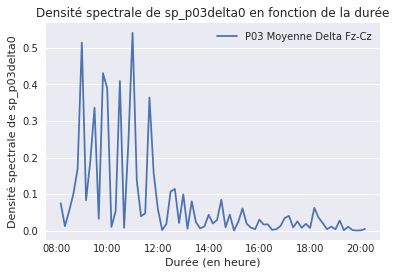

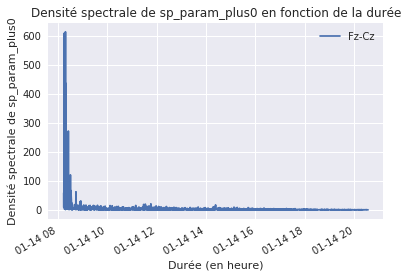

In [16]:
def affichage_spectre_dataframe0(spectre, figure=1):
    N = int(len(spectre)/2)
    spectre.iloc[N+1:].plot()
    nom_spectre = nom_objet(spectre)
    plt.xlabel('Durée (en heure)')
    labelY = 'Densité spectrale de ' + nom_spectre
    plt.ylabel(labelY)
    title = 'Densité spectrale de ' + nom_spectre + ' en fonction de la durée'
    plt.title(title)
    plt.show()
    

affichage_spectre_dataframe0(sp_p03delta0)    
affichage_spectre_dataframe0(sp_param_plus0)

## Affichage des spectres avec subplot

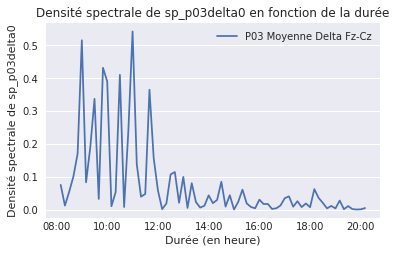

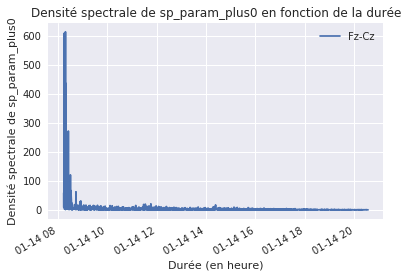

In [17]:
def affichage_spectre_dataframe0_subplot(spectre, figure=1):
    N = int(len(spectre)/2)
    spectre.iloc[N+1:].plot(subplots=True)
    nom_spectre = nom_objet(spectre)
    plt.xlabel('Durée (en heure)')
    labelY = 'Densité spectrale de ' + nom_spectre
    plt.ylabel(labelY)
    title = 'Densité spectrale de ' + nom_spectre + ' en fonction de la durée'
    plt.title(title)
    plt.show()
    
affichage_spectre_dataframe0_subplot(sp_p03delta0)        
affichage_spectre_dataframe0_subplot(sp_param_plus0)    

## Spectrogramme

In [18]:
def affichage_spectrogramme(data, fe, freq_dtxlabel=None, figure=1, cmap=None, nperseg=256, noverlap=None, nfft=None):
    signal = np.array(data.iloc[:])
    nb_signal = signal.shape[1]
    if nb_signal == 1:
        s = np.array(data.iloc[:, 0])
        plt.figure(figure)
        freq, temps, spectro = sg.spectrogram(s, fe, nperseg=nperseg, noverlap=noverlap, nfft=nfft)
        temps_h = temps / 3600
        if freq_dtxlabel is None:
            duree = data.index[-1] - data.index[0]
            duree_heure = duree.total_seconds() / 3600
            freqx = round(duree_heure / len(temps_h), 4)
            freq_dtxlabel = str(freqx) + 'H'
        dtxlabel = pd.date_range(start=data.index[0], periods=len(temps_h), freq=freq_dtxlabel)
        plt.pcolormesh(dtxlabel, freq, spectro, cmap=cmap)
        plt.grid()
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [h]')
        titre = 'Spectrogramme avec nperseg = ' + str(nperseg) + ' noverlap = ' + str(noverlap) + ' et nfft = ' + str(nfft)
        plt.title(titre)
        plt.show()
        return freq, dtxlabel, spectro
    if nb_signal > 1:
        spectro = []
        for i in range(nb_signal):
            s = np.array(data.iloc[:, i])
            plt.figure(figure)
            freq, temps, Sxx = sg.spectrogram(s, fe, nperseg=nperseg, noverlap=noverlap, nfft=nfft)
            temps_h = temps / 3600
            if freq_dtxlabel is None:
                duree = data.index[-1] - data.index[0]
                duree_heure = duree.total_seconds() / 3600
                freqx = round(duree_heure / len(temps_h), 4)
                freq_dtxlabel = str(freqx) + 'H'
            dtxlabel = pd.date_range(start=data.index[0], periods=len(temps_h), freq=freq_dtxlabel)
            plt.pcolormesh(dtxlabel, freq, Sxx, cmap=cmap)
            #plt.pcolormesh(temps_h, freq, Sxx, cmap=cmap)
            plt.grid()
            plt.ylabel('Frequency [Hz]')
            plt.xlabel('Time [sec]')
            titre = 'Spectrogramme avec nperseg = ' + str(nperseg) + ' noverlap = ' + str(noverlap) + ' et nfft = ' + str(nfft)
            plt.title(titre)
            plt.show()
            spectro.append(Sxx)
        return freq, dtxlabel, spectro
    else:
        return "Erreur : il n'y a pas de signal à afficher"

Spectrogramme de eeg


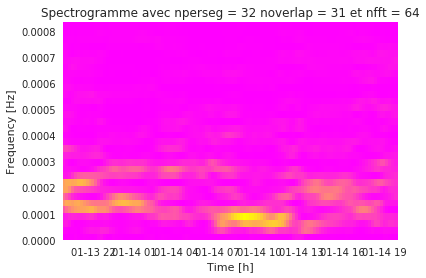

Spectrogramme de eeg2


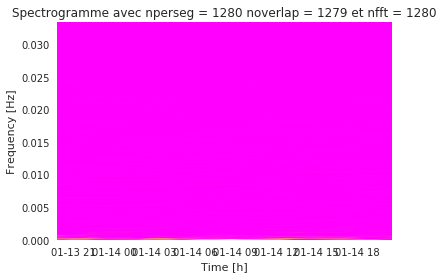

In [20]:
# eeg
print('Spectrogramme de eeg')
fe = 1 / 600
D = 32
freq, temps_h, spectro = affichage_spectrogramme(p03delta0, fe, figure=1, cmap='spring', nperseg=D, noverlap=31, nfft=64)


# eeg2
print('Spectrogramme de eeg2')
fe2 = 1 / 15
D2 = 4 * 320
freq2, temps_h2, spectro2 = affichage_spectrogramme(param_plus0, fe2, cmap = 'spring', nperseg=D2,noverlap = D2-1, nfft=D2)



### Zoom du spectrogramme

Spectrogramme de eeg


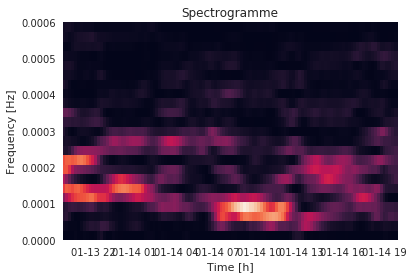

Spectrogramme de eeg2


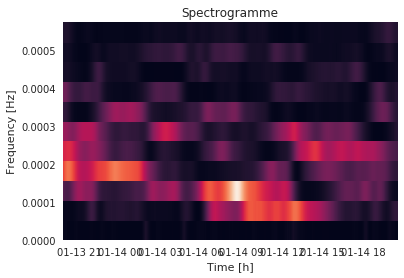

In [21]:
def zoom_spectro(spectro, freq, temps, freq_lim, cmap=None):
    spectro_return = []
    freq_return = []
    for i in range(len(freq)):
        if freq[i] <= freq_lim:
            spectro_return.append(spectro[i])
            freq_return.append(freq[i])
    plt.pcolormesh(temps, freq_return, spectro_return, cmap=cmap)
    plt.grid()
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [h]')
    titre = 'Spectrogramme' 
    plt.title(titre)
    plt.show()
    #return spectro_return, freq_return
    
#eeg
print('Spectrogramme de eeg')
zoom_spectro(spectro, freq, temps_h, 0.0006)  # avec données de eeg (données moyennes)

#eeg2
print('Spectrogramme de eeg2')
zoom_spectro(spectro2, freq2, temps_h2, freq_lim=0.0006)  # avec données de eeg (données brutes)